In [2]:
import pandas as pd
from google.colab import files

uploaded=files.upload()

kidney_data=pd.read_csv("kidney_disease.csv")

kidney_data.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Drop unnecessary columns (e.g., 'id')
kidney_data.drop('id', axis=1, inplace=True)

# Clean the 'classification' column to remove whitespace
kidney_data['classification'] = kidney_data['classification'].str.strip()

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
kidney_data_imputed = pd.DataFrame(imputer.fit_transform(kidney_data), columns=kidney_data.columns)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in kidney_data_imputed.select_dtypes(include='object').columns:
    if column != 'classification':
        le = LabelEncoder()
        kidney_data_imputed[column] = le.fit_transform(kidney_data_imputed[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
kidney_data_imputed['classification'] = target_encoder.fit_transform(kidney_data_imputed['classification'])

# Split the dataset into features and target
X = kidney_data_imputed.drop('classification', axis=1)
y = kidney_data_imputed['classification']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        76
      notckd       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Define the list of main features (only the 15 features you want to use)
main_features = [
    'age', 'bp', 'sg', 'al', 'su', 'rbc',
    'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
    'pcv', 'wc', 'rc'
]

# Clean the 'classification' column to remove whitespace
kidney_data['classification'] = kidney_data['classification'].str.strip()

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
kidney_data_imputed = pd.DataFrame(imputer.fit_transform(kidney_data), columns=kidney_data.columns)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in kidney_data_imputed.select_dtypes(include='object').columns:
    if column != 'classification':
        le = LabelEncoder()
        kidney_data_imputed[column] = le.fit_transform(kidney_data_imputed[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
kidney_data_imputed['classification'] = target_encoder.fit_transform(kidney_data_imputed['classification'])

# Select the main features for the model
X = kidney_data_imputed[main_features]
y = kidney_data_imputed['classification']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Now for user input:

import numpy as np

def get_user_input(scaler, clf, target_encoder):
    print("Please enter the following details:")
    try:
        # Get user input only for the 15 main features
        age = float(input("Age: "))
        blood_pressure = float(input("Blood Pressure: "))
        specific_gravity = float(input("Specific Gravity: "))
        albumin = int(input("Albumin: "))
        sugar = int(input("Sugar: "))
        red_blood_cells = int(input("Red Blood Cells (0 for normal, 1 for abnormal): "))
        blood_glucose_random = float(input("Blood Glucose Random: "))
        blood_urea = float(input("Blood Urea: "))
        serum_creatinine = float(input("Serum Creatinine: "))
        sodium = float(input("Sodium: "))
        potassium = float(input("Potassium: "))
        hemoglobin = float(input("Hemoglobin: "))
        packed_cell_volume = float(input("Packed Cell Volume: "))
        white_blood_cell_count = float(input("White Blood Cell Count: "))
        red_blood_cell_count = float(input("Red Blood Cell Count: "))

        # Create a feature array based on the 15 main features
        features = np.array([[
            age, blood_pressure, specific_gravity, albumin, sugar,
            red_blood_cells, blood_glucose_random, blood_urea,
            serum_creatinine, sodium, potassium, hemoglobin,
            packed_cell_volume, white_blood_cell_count, red_blood_cell_count
        ]])

        # Scale the features using the same scaler used during training
        processed_features = scaler.transform(features)

        # Predict the class
        prediction = clf.predict(processed_features)
        result = target_encoder.inverse_transform(prediction)[0]

        # Output the result
        print(f"Based on the input data, the prediction is: {result}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Call the function and pass the necessary objects as arguments
get_user_input(scaler, clf, target_encoder)


Model Accuracy: 0.9916666666666667
Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        76
      notckd       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Please enter the following details:
Age: 18
Blood Pressure: 80
Specific Gravity: 0.8
Albumin: 0
Sugar: 0
Red Blood Cells (0 for normal, 1 for abnormal): 0
Blood Glucose Random: 3.9
Blood Urea: 15
Serum Creatinine: 1
Sodium: 135
Potassium: 4
Hemoglobin: 15
Packed Cell Volume: 44
White Blood Cell Count: 9000
Red Blood Cell Count: 4.35
Based on the input data, the prediction is: ckd


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<ipython-input-5-5c679f6c2d98>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=kidney_data_imputed, x='classification', palette='Set2')


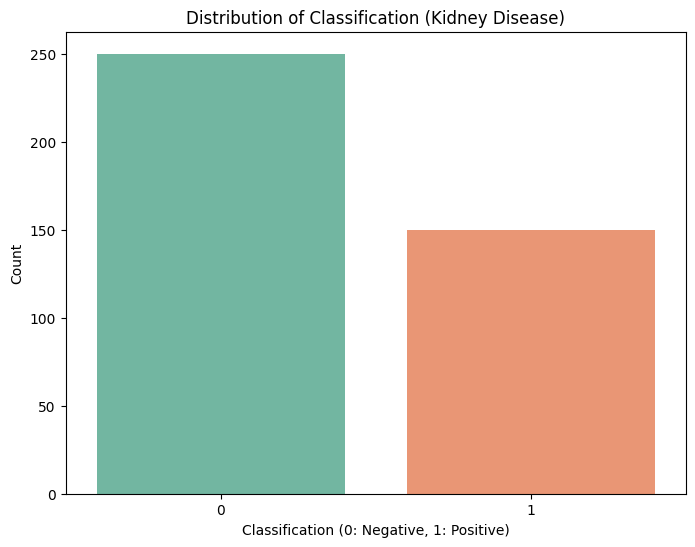

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable 'classification'
plt.figure(figsize=(8, 6))
sns.countplot(data=kidney_data_imputed, x='classification', palette='Set2')
plt.title("Distribution of Classification (Kidney Disease)")
plt.xlabel("Classification (0: Negative, 1: Positive)")
plt.ylabel("Count")
plt.show()


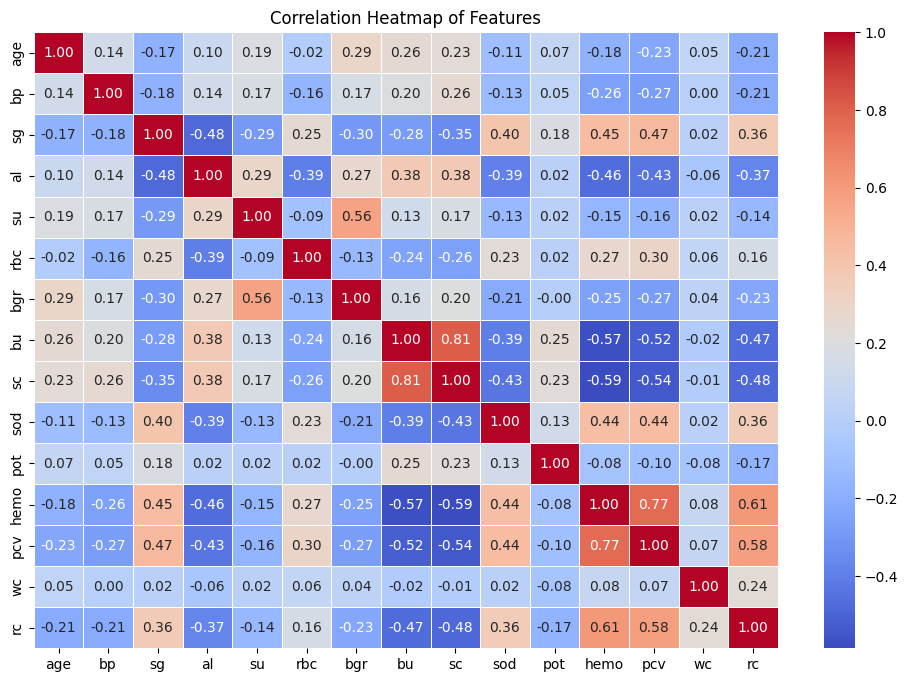

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = kidney_data_imputed[main_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

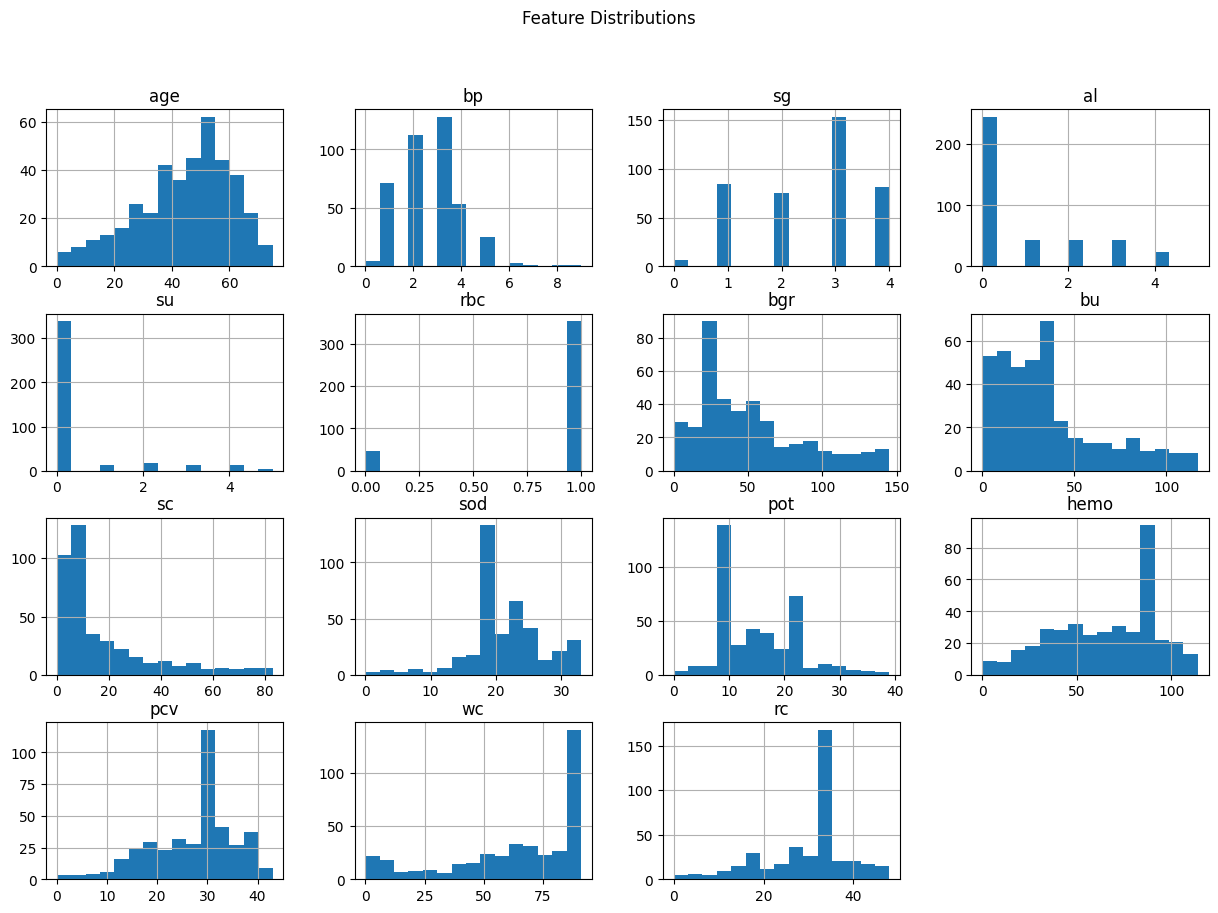

In [9]:
# Plotting histograms for main features
kidney_data_imputed[main_features].hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


<ipython-input-10-5fbba27e7bda>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


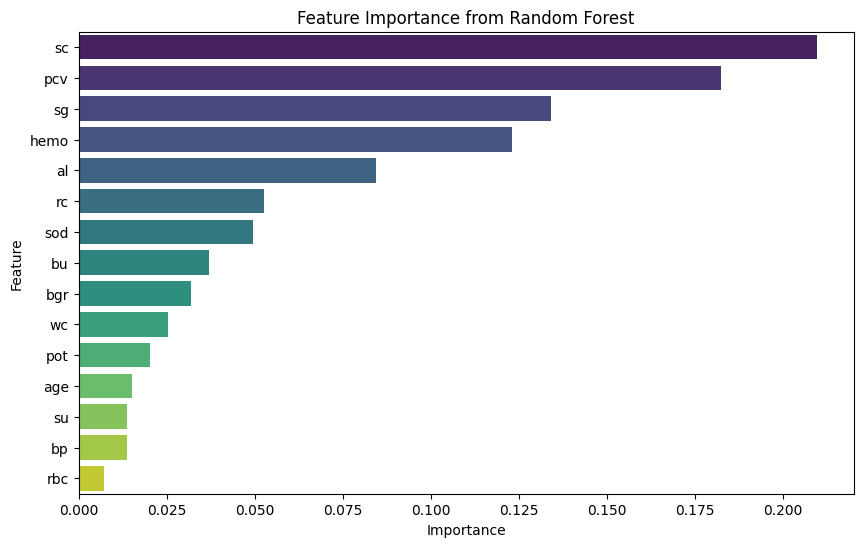

In [10]:
# Feature importance from RandomForest
feature_importance = clf.feature_importances_
feature_names = main_features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.show()